# Cho dữ liệu mushroom trong tập tin mushrooms.csv chứa thông tin của các mẫu nấm, nấm ăn được và không ăn được.
## Thông tin dữ liệu:
## Dữ liệu có thể tham khảo và download tại: https://www.kaggle.com/jnduli/decision-tree-classifier-for-mushroom-dataset/data (https://www.kaggle.com/jnduli/decision-tree-classifier-for-mushroom-dataset/data)

## Data Infromation
### Bộ dữ liệu chứa 23 thuộc tính. 
- Thuộc tính "class" là class attribute: Attribute Information:(classes: edible=e, poisonous=p)
- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
- cap-color:brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
- bruises: bruises=t,no=f
- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
- gill-attachment: attached=a,descending=d,free=f,notched=n
- gill-spacing: close=c,crowded=w,distant=d
- gill-size: broad=b,narrow=n
- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
- stalk-shape: enlarging=e,tapering=t
- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-color-above-ring:brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- stalk-color-below-ring:brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- veil-type: partial=p,universal=u
- veil-color: brown=n,orange=o,white=w,yellow=y
- ring-number: none=n,one=o,two=t
- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
- spore-print-color:black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

# <span style='color:red;'>Yêu cầu:

## Đọc dữ liệu, tìm hiểu sơ bộ về dữ liệu
## Chọn phương pháp để chuẩn hóa dữ liệu text và thực hiện việc chuẩn hóa.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [4]:
mushroom = pd.read_csv('data5/Ex1_Mushroom/mushrooms.csv')
mushroom

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


## Problem: predict a mushroom is "edible" or "poisonous" based on other information
## Output: class (poisonous or edible)
## Input: other columns

## <span style='color:yellow;'>All features are nominal => use one-hot encoder or dummies encoder to label

### Use one-hot encoder to encode output "class"

In [8]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first')

y = encoder.fit_transform(mushroom[['class']]).toarray()
y = pd.DataFrame(y, columns=['class_p'])
y

,class_p
0,1.0
1,0.0
2,0.0
3,1.0
4,0.0
...,...
8119,0.0
8120,0.0
8121,0.0
8122,1.0


In [10]:
print(mushroom['class'].value_counts())

print()

print(y.value_counts())

class
e    4208
p    3916
Name: count, dtype: int64

class_p
0.0        4208
1.0        3916
Name: count, dtype: int64


### Use pd.get_dummies to encode input features since there are so many column

In [13]:
x = mushroom.drop('class', axis=1) #Remove the "class" column as it is output
#x = pd.get_dummies(x, drop_first=True).astype(int)
x = pd.get_dummies(x).astype(int)
x

#There are totally 117 unique values across 23 columns of mushroom
#so when use dummies to encode, there will be 117 columns/features
#If we set drop_first=True, it drop the first column of each feature set
#so 117 - 23 = 96 columns left

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


## <span style='color:yellow;'>Use decision tree model to classify/predict output Y from X

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#test_size=0.3 means 30% of datatest will be used as testing set, the remaining 70% (train_size=0.7) is traiing set

#random_state=42 to ensure that the split is reproducible — meaning, if you run the code multiple times with the same data and the same random_state = 42, 
#  you'll always get the same split between training and testing sets

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.validation import column_or_1d

#column_or_1d(): to ensure that an input (typically a feature array or vector) is either a 1D array or a column vector, 
#and it will flatten it to a 1D array if it's not already in that form. 
#It is useful for validating and reshaping data before passing it to machine learning algorithms in scikit-learn

In [20]:
tree_n = DecisionTreeClassifier(criterion = 'entropy')
tree_n.fit(x_train, y_train) #Train the model with x_train and y_train

DecisionTreeClassifier(criterion='entropy')

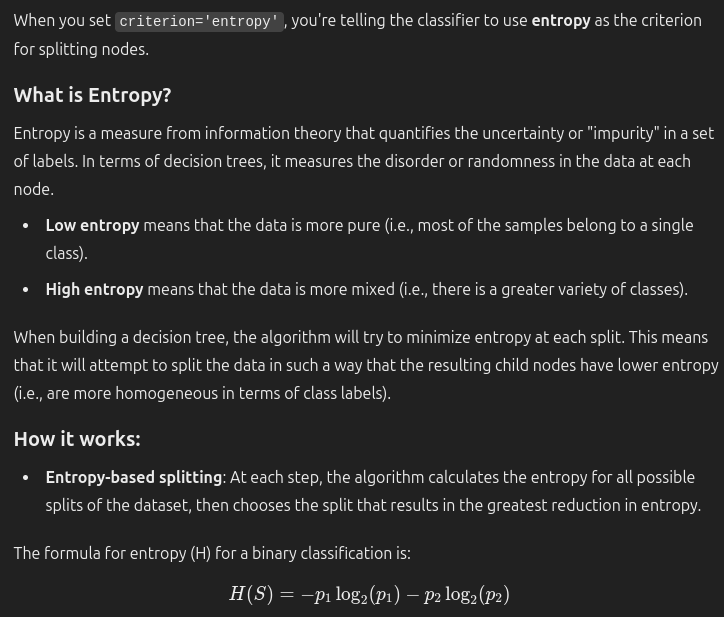

## <span style='color:yellow;'>Visualize tree (2 methods)

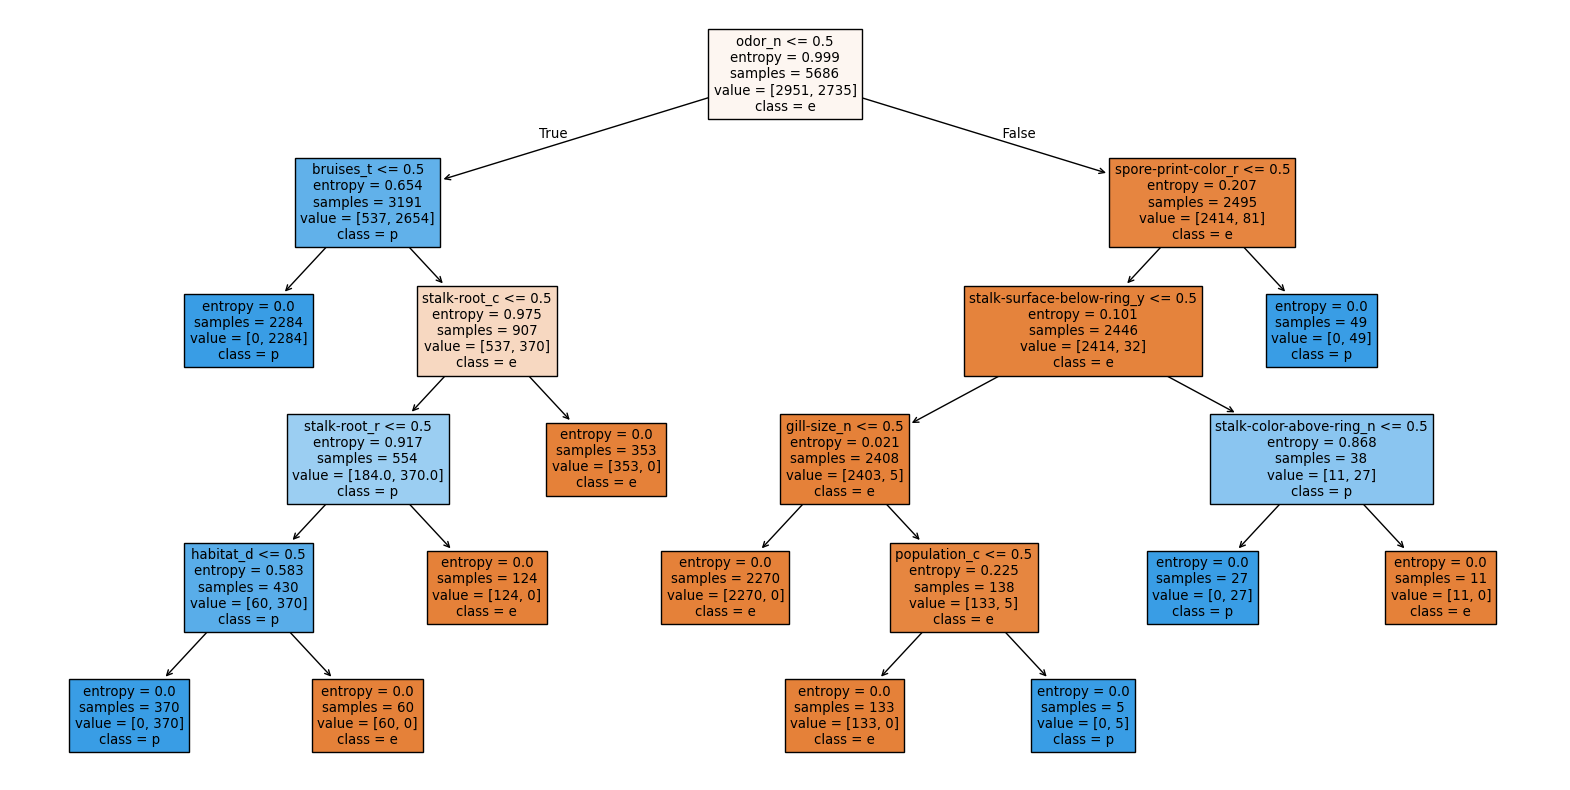

In [30]:
#Visualize the tree (Method1)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(tree_n, feature_names=x.columns, class_names=['e', 'p'], filled=True)
plt.show()

#filled=True: When set to ``True``, paint nodes to indicate majority class for classification, extremity of values for regression, or purity of node for multi-output.

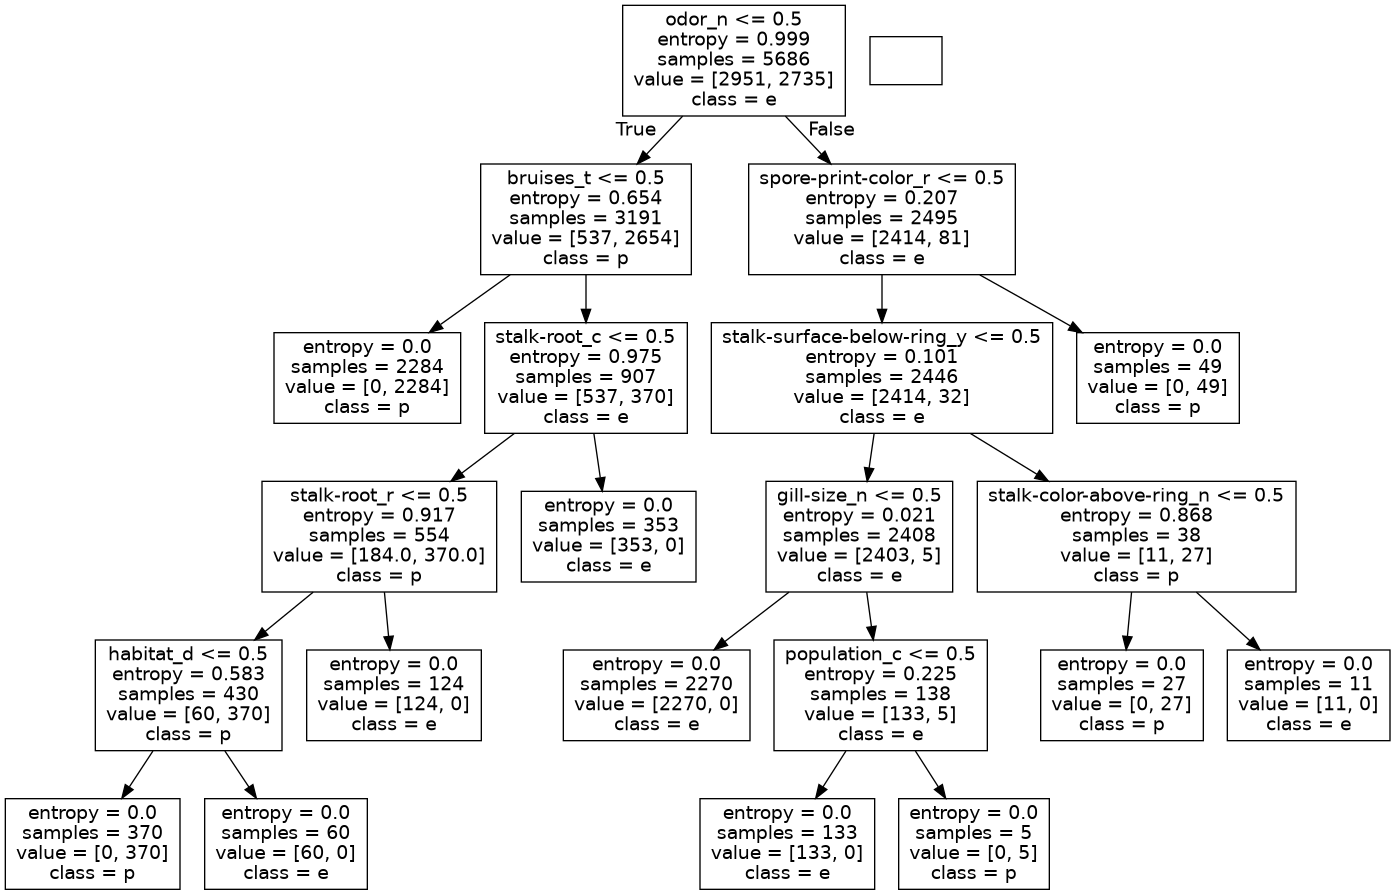

In [36]:
from IPython import Image
from sklearn import tree
import pydotplus

dot_data = tree.export_graphviz(tree_n, out_file=None,
                               feature_names=x.columns,
                               class_names=['e', 'p'])

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## <span style='color:yellow;'>Check for accuracy

In [44]:
print(f"The Training prediction accuracy = {tree_n.score(x_train,y_train)*100}%" )
print(f"The Testing prediction accuracy = {tree_n.score(x_test,y_test)*100}%" )

The Training prediction accuracy = 100.0%
The Testing prediction accuracy = 100.0%


## <span style='color:yellow;'>Model validation

In [52]:
y_predict_train = tree_n.predict(x_train)
y_predict_test = tree_n.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_predict_test))
#Compute confusion matrix to evaluate the accuracy of a classification.

print()

print(classification_report(y_test, y_predict_test))
#Build a text report showing the main classification metrics.

[[1257    0]
 [   0 1181]]

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1257
         1.0       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



## <span style='color:red;'>Result

### Both Train and Test have high score, without overfitting/underfitting
### => Model is suitable